Text(0.5, 1.0, 'Histogram Citra Output')

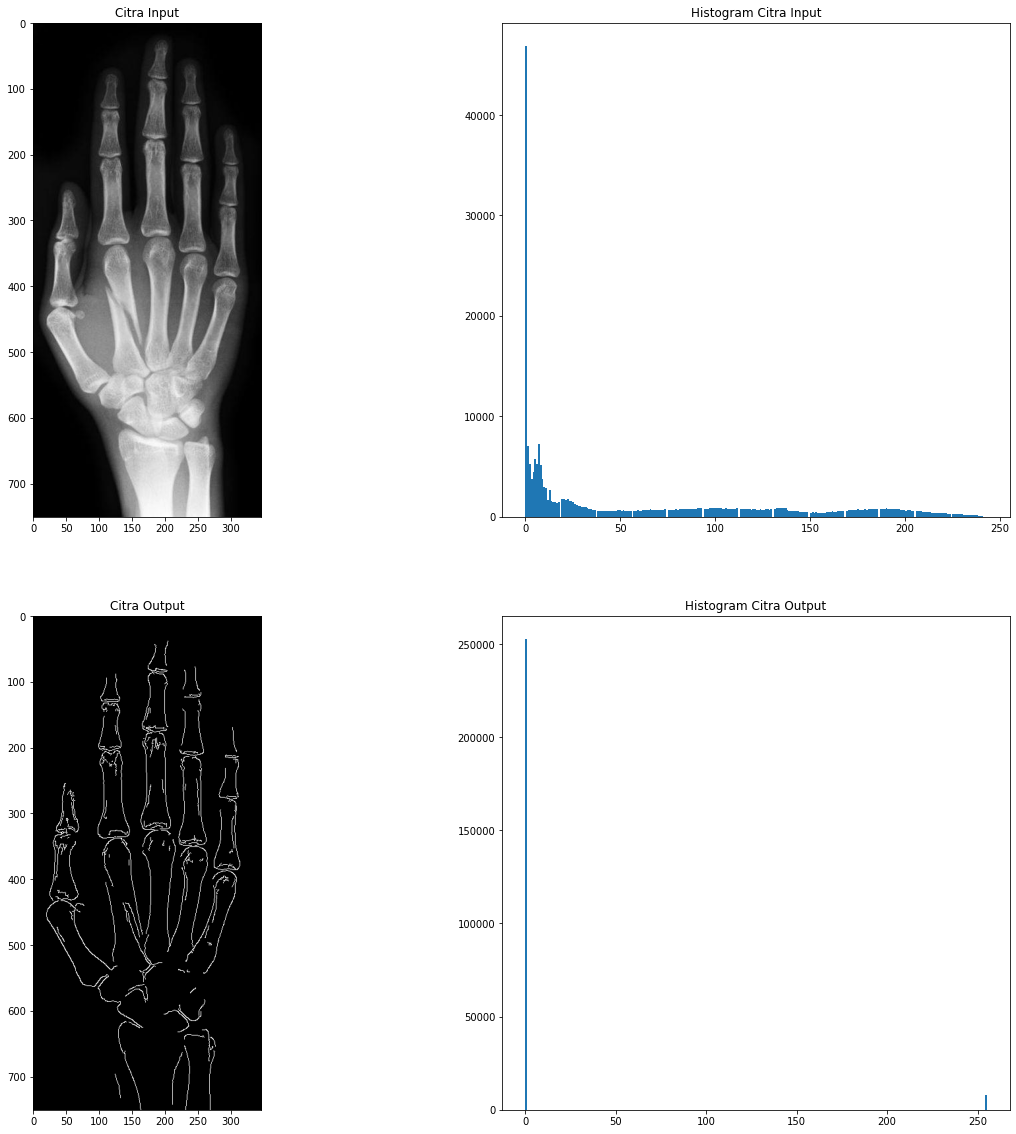

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import data

img = cv2.imread('14.jpg',0)
img_canny = cv2.Canny(img,100,200)
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(img, cmap = 'gray')
ax[0].set_title("Citra Input")
ax[1].hist(img.ravel(), bins = 256)
ax[1].set_title("Histogram Citra Input")

ax[2].imshow(img_canny, cmap = 'gray')
ax[2].set_title("Citra Output")
ax[3].hist(img_canny.ravel(), bins = 256)
ax[3].set_title("Histogram Citra Output")


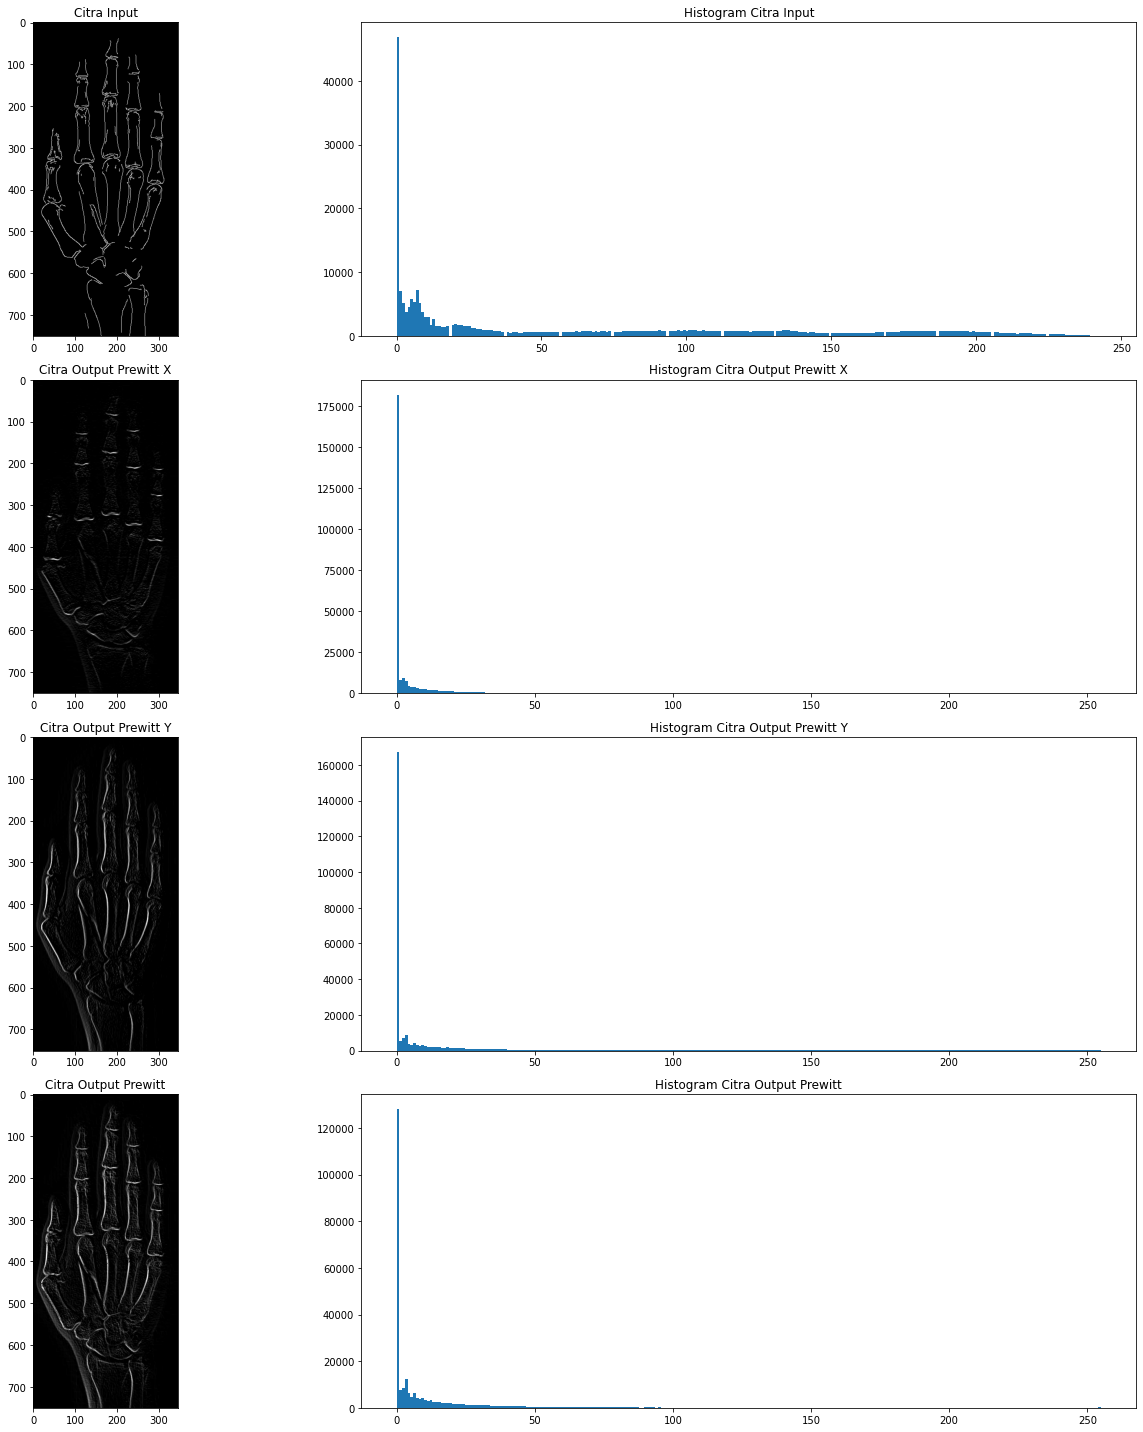

In [3]:
img0 = img_canny

kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

img_prewittx = cv2.filter2D(img, -1, kernelx)
img_prewitty = cv2.filter2D(img, -1, kernely)
img_prewitt = img_prewittx + img_prewitty

fig, axes = plt.subplots(4, 2, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(img0, cmap = 'gray')
ax[0].set_title("Citra Input")
ax[1].hist(img.ravel(), bins = 256)
ax[1].set_title("Histogram Citra Input")

ax[2].imshow(img_prewittx, cmap = 'gray')
ax[2].set_title("Citra Output Prewitt X")
ax[3].hist(img_prewittx.ravel(), bins = 256)
ax[3].set_title("Histogram Citra Output Prewitt X")

ax[4].imshow(img_prewitty, cmap = 'gray')
ax[4].set_title("Citra Output Prewitt Y")
ax[5].hist(img_prewitty.ravel(), bins = 256)
ax[5].set_title("Histogram Citra Output Prewitt Y")

ax[6].imshow(img_prewitt, cmap = 'gray')
ax[6].set_title("Citra Output Prewitt")
ax[7].hist(img_prewitt.ravel(), bins = 256)
ax[7].set_title("Histogram Citra Output Prewitt")

fig.tight_layout()


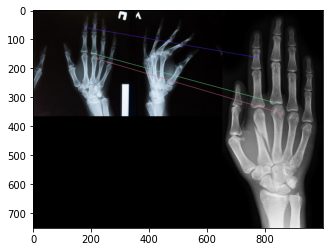

(<matplotlib.image.AxesImage at 0x7fcddf5d8ed0>, None)

In [5]:
# Gunakan gambar dari eLOK
img1 = cv2.imread('11318-ilustrasi-tulang-pexelscottonbro.jpg')          # gambar yang dituju
img2 = cv2.imread('14.jpg')             # gambar yang dicari
gray1= cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2= cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

# Menggunakan Detector SIFT
sift = cv2.xfeatures2d.SIFT_create()

# Mencari Keypoint dengan SIFT
kp1, des1 = sift.detectAndCompute(gray1,None)
kp2, des2 = sift.detectAndCompute(gray2,None)

# Melakukan Matching dari hasil deteksi keypoints menggunakan
# BruteForce Matcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Uji rasio matching sederhana
good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append([m])
img3 = None

# menggambar hasil match pada gambar baru (IMG3)
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,img3,flags=2)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)),plt.show()


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data_baru = pd.read_csv('/content/train.csv')
data_baru

,filename,width,height,class,xmin,ymin,xmax,ymax,image_id
0,10.jpg,800,531,fracture,291,225,352,309,0
1,158.jpg,872,1024,fracture,578,202,675,349,1
2,158.jpg,872,1024,fracture,570,67,609,132,1
3,37.jpg,1500,2000,fracture,715,1114,921,1405,2
4,87.jpg,555,865,fracture,141,402,170,421,3
...,...,...,...,...,...,...,...,...,...
288,69.jpg,327,442,fracture,84,217,117,274,233
289,213.jpg,946,1500,fracture,285,781,378,899,234
290,213.jpg,946,1500,fracture,376,746,469,869,234
291,234.jpg,525,812,fracture,400,384,446,431,235


In [17]:
data_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  293 non-null    object
 1   width     293 non-null    int64 
 2   height    293 non-null    int64 
 3   class     293 non-null    object
 4   xmin      293 non-null    int64 
 5   ymin      293 non-null    int64 
 6   xmax      293 non-null    int64 
 7   ymax      293 non-null    int64 
 8   image_id  293 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 20.7+ KB


In [18]:
data_baru.isna().sum()

filename    0
width       0
height      0
class       0
xmin        0
ymin        0
xmax        0
ymax        0
image_id    0
dtype: int64

In [19]:
len(data_baru)

293

In [20]:
data_baru.groupby('height')['xmax'].count().to_frame()

,xmax
height,
0,25
224,1
239,1
270,4
288,2
...,...
1706,10
1754,1
2000,2


In [21]:
data_baru.groupby('height')['xmax'].agg(['count', 'mean', 'median'])

,count,mean,median
height,,,
0,25,246.60,237.0
224,1,127.00,127.0
239,1,115.00,115.0
270,4,86.25,86.5
288,2,247.00,247.0
...,...,...,...
1706,10,1038.20,1059.5
1754,1,364.00,364.0
2000,2,934.50,934.5


In [22]:
from sklearn.cluster import KMeans

X = data_baru.drop(['filename', 'class'], axis=1)

clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

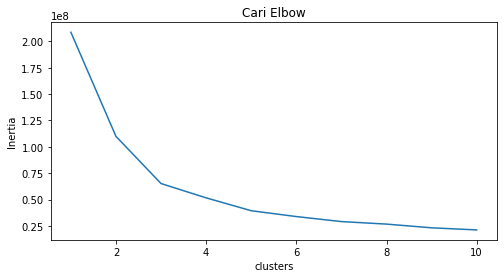

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

#membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('Inertia')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


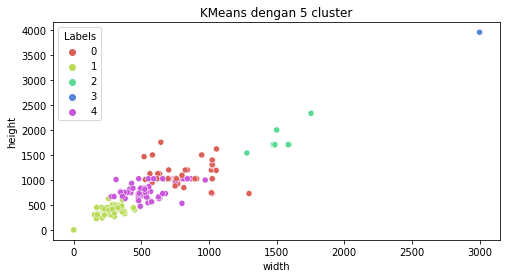

In [24]:
#membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)

#menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

#membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(X['width'], X['height'], hue=X['Labels'], palette=sns.color_palette('hls',5))
plt.title('KMeans dengan 5 cluster')
plt.show()

In [25]:
data_baru.groupby('class')['height'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
fracture,293.0,752.40273,494.815271,0.0,380.0,734.0,1024.0,3955.0


In [26]:
data_baru.groupby('class')['width'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
fracture,293.0,561.129693,399.408317,0.0,285.0,500.0,750.0,3000.0


In [27]:
data_baru.groupby('class')['ymax'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
fracture,293.0,458.679181,302.027758,42.0,242.0,408.0,602.0,2708.0


In [28]:
data_baru.groupby('class')['xmax'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
fracture,293.0,364.368601,281.206185,29.0,175.0,283.0,446.0,2084.0
